## IMPORT DATA 

In [1]:
#importing necessary libraries I will be using 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn')
%matplotlib inline 

#pulling database and converting csv file to a pandas DataFrame in order to manipulate data effectively and effeciently 
df = pd.read_csv('kc_house_data.csv')

#checking data
df.head()

#checking data types
df.info()

#checking for null values 
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [2]:
#dropping columns that aren't relevant 
df = df.drop(['id', 'lat', 'long', 'date', 'zipcode', 'yr_renovated', 'yr_built'], axis = 1)

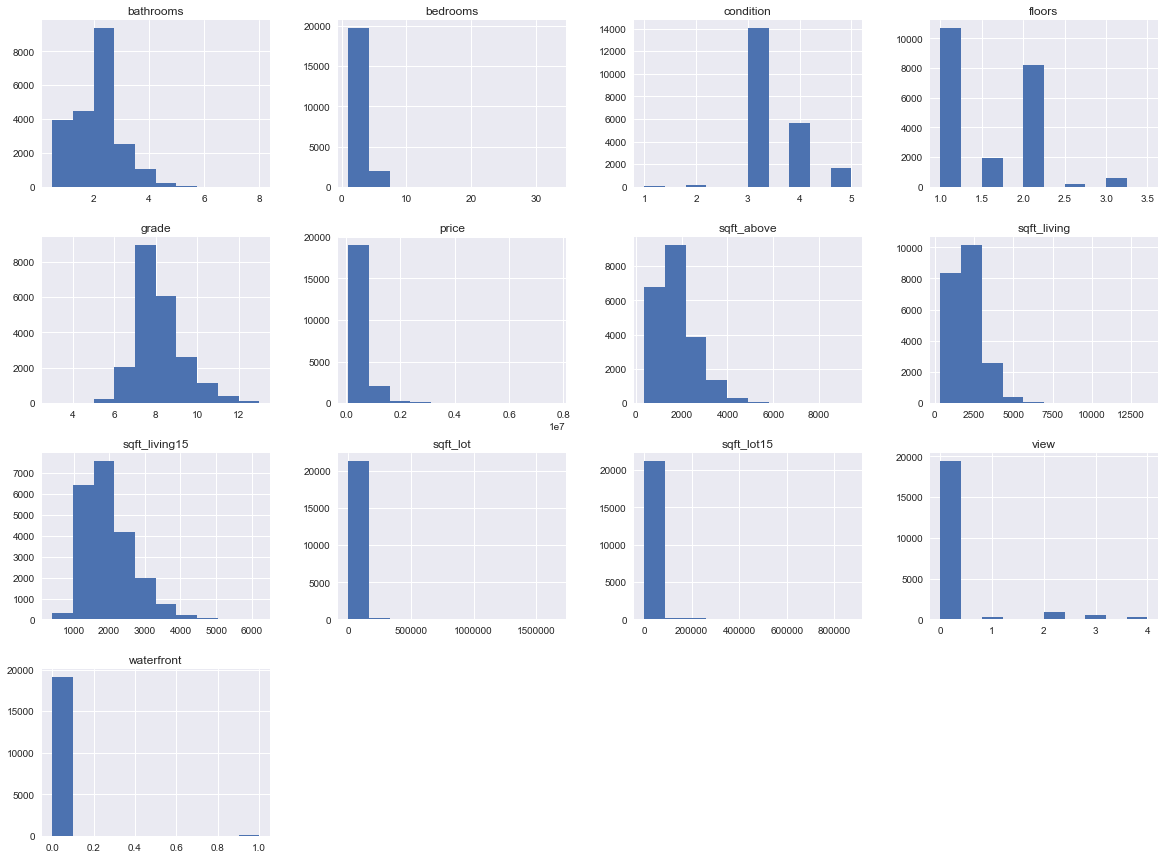

In [3]:
df.hist(figsize = (20,15));

In [12]:
#replacing null values 
#replacing null values with zero inorder to clean column  


#replaced null values with zero because we don't have a record showing the house had any prior views. 
df['view'] = df['view'].fillna(value=0)

#replaced null values with zero because this was a categorical data.
df['waterfront'] = df.waterfront.fillna(value=0)

#slicing rows in 'sqft_basement' that contains '?' in the values
df = df[df.sqft_basement != '?']
df.head(12)
#checking work
df.sqft_basement.value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
850.0        72
          ...  
2600.0        1
784.0         1
2390.0        1
1135.0        1
666.0         1
2400.0        1
2500.0        1
2120.0        1
266.0         1
3260.0        1
3000.0        1
861.0         1
518.0         1
2196.0        1
415.0         1
1281.0        1
283.0         1
1248.0        1
2130.0        1
946.0         1
248.0         1
1798.0        1
2850.0        1
295.0         1
3500.0        1
2050.0        1
875.0         1
1770.0        1
652.0         1
4820.0        1
Name: sqft_basement, Len

In [13]:
#converting data types
#sqft_basement, convert data type into an interger 
df.sqft_basement = df.sqft_basement.astype('float64')
df.waterfront = df.waterfront.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null int64
view             21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(5), int64(9)
memory usage: 2.4 MB


## Exploring Our Data
- Checking for column distribution
- Examine our descriptive statistics 
- Use visualization to better understand our data 

### Which predictors is are the most correlated with price?

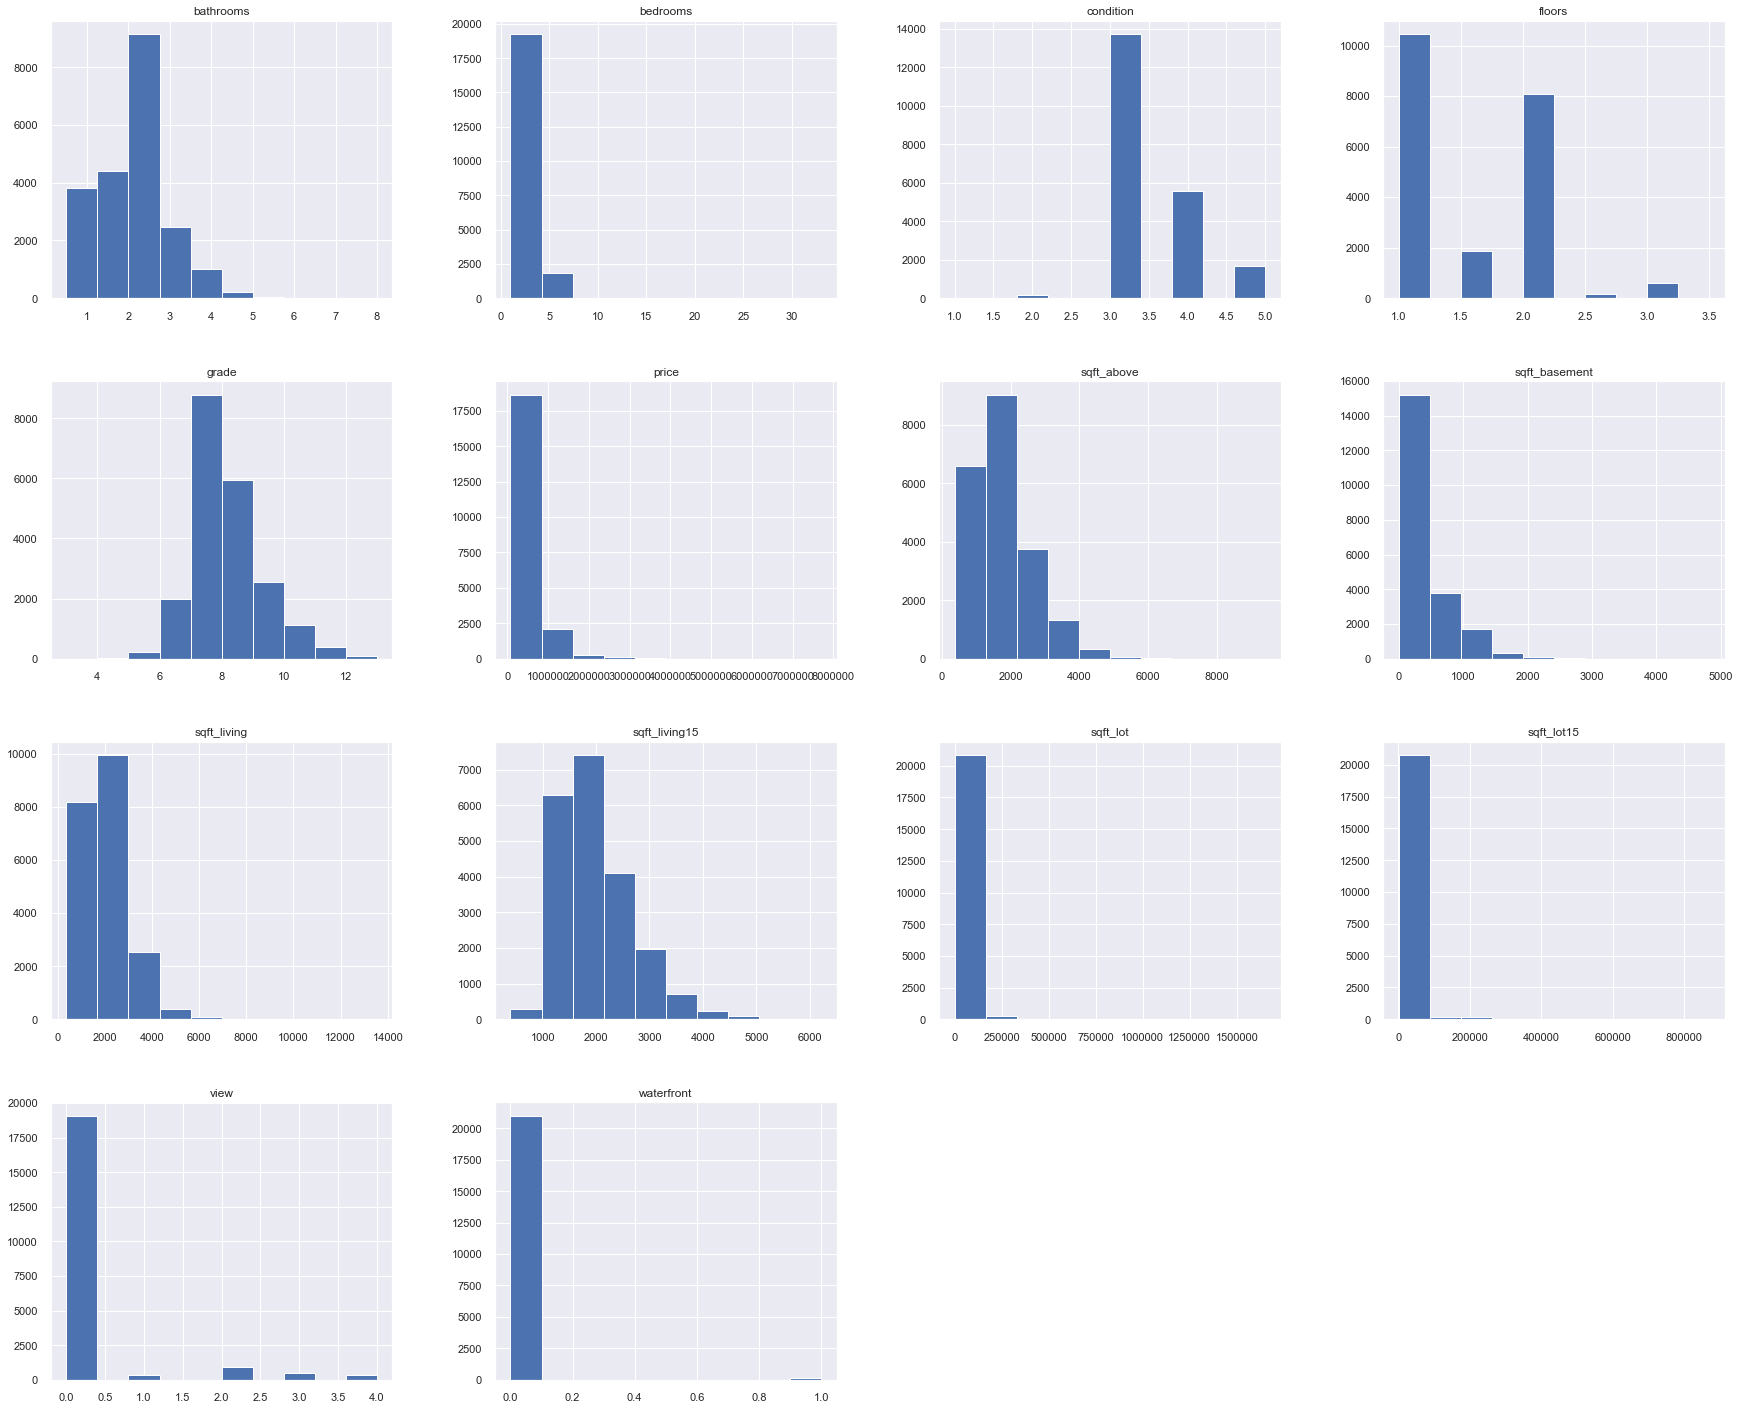

In [14]:
#checking for general distribution for numerical features 
df.hist(figsize= [30,25]);

### Visualizing correlation using a heatmap
In the below heatmap image, the predictors shows a positve correlation with price. 

Text(0.5, 1.0, 'Heatmap Correlation')

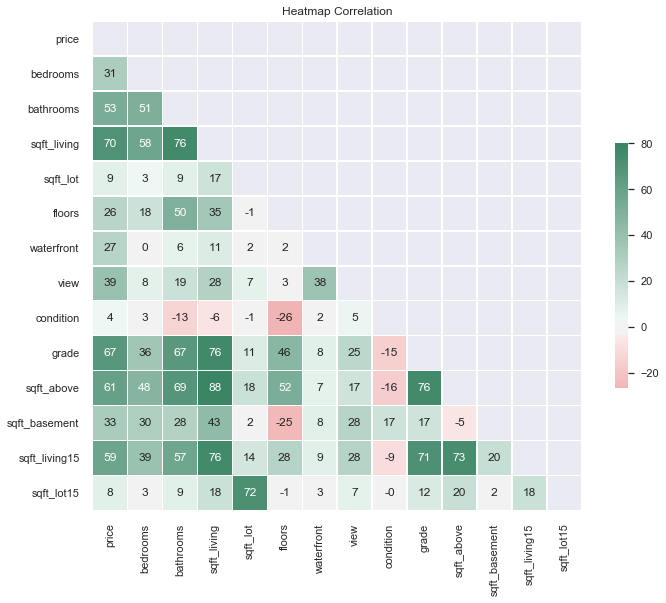

In [15]:
#Heatamp to visualize correleation of df_one 

# Set the style of the visualization
sns.set()

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(12, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr*100, fmt= ".0f",annot= True, mask=mask, cmap=cmap, vmax=80, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Heatmap Correlation')

In [16]:
#checking to see which predictors are most correlated to price 
df.corr().head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.394885,0.035290,0.667738,0.605143,0.325008,0.586415,0.083192
bedrooms,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.080208,0.025710,0.356882,0.479210,0.302683,0.392476,0.030479
bathrooms,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.186795,-0.128015,0.666493,0.686456,0.282693,0.570129,0.088834
sqft_living,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.282950,-0.061294,0.763101,0.876678,0.434576,0.756389,0.184466
sqft_lot,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.072420,-0.009671,0.113402,0.183461,0.015533,0.143428,0.720649
floors,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.027727,-0.264280,0.459214,0.524225,-0.245144,0.280294,-0.011545
waterfront,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.378926,0.016728,0.083602,0.072201,0.084949,0.085174,0.030250
view,0.394885,0.080208,0.186795,0.282950,0.072420,0.027727,0.378926,1.000000,0.045355,0.249354,0.166610,0.275440,0.280282,0.072555
condition,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.045355,1.000000,-0.148508,-0.159289,0.170972,-0.093493,-0.004860
grade,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.249354,-0.148508,1.000000,0.756382,0.168023,0.713574,0.121921


### Current Observations 
The top three predictors that has the most correlation with price is: 
1. sqft_living - footage of the home
2. grade - overall grade given to the housing unit, based on King County grading system
3. sqft_above - square footage of house apart from basement


### What is the average of the top three predictors?

In [17]:
#The average of the top three predictors are: 
print('sqft_living:', df.sqft_living.mean())
print('grade:', df.grade.mean())
print('sqft_above:', df.sqft_above.mean())

sqft_living: 2080.9207302653363
grade: 7.658279335950433
sqft_above: 1789.069006290498


## Splitting dataframes into categorical and numerical

In [18]:
df_cat = pd.DataFrame(df, columns= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade' ])
df_num = pd.DataFrame(df, columns= ['price','sqft_living', 'sqft_above', 'sqft_basement' , 'sqft_living15'])

In [19]:
#df_num.price = (df.price - df.mean.()) / df.price.std()

In [20]:
# #Normalize and scale numerical variables using 
from sklearn.preprocessing import StandardScaler 

# mean = MeanScaler()
scaler = StandardScaler()
df_num_norm = scaler.fit_transform(df_num)
df_num_scaler = pd.DataFrame(df_num_norm, columns = ['price','sqft_living', 'sqft_above', 'sqft_basement' , 'sqft_living15'])
df_num_scaler.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,price,sqft_living,sqft_above,sqft_basement,sqft_living15
0,-0.865634,-0.980833,-0.735244,-0.659570,-0.944020
1,-0.006821,0.532461,0.459845,0.244410,-0.433559
2,-0.979472,-1.427201,-1.230180,-0.659570,1.068656
3,0.172494,-0.131647,-0.892175,1.396984,-0.914851
4,-0.082895,-0.436483,-0.131664,-0.659570,-0.273128


In [22]:
#Encoding categorical variables
#it is essential to encode categorical features into numerical values because machine learning algorithm can only read numerical values 

df_cat = pd.get_dummies(df_cat, columns= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade' ])

### Merge the Numerical and Categorical Datasets into one dataset

In [23]:
df_merge = pd.concat([df_num_scaler, df_cat],join = 'inner', axis= 1)
df_merge.head()

,price,sqft_living,sqft_above,sqft_basement,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.865634,-0.980833,-0.735244,-0.659570,-0.944020,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.006821,0.532461,0.459845,0.244410,-0.433559,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.979472,-1.427201,-1.230180,-0.659570,1.068656,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.172494,-0.131647,-0.892175,1.396984,-0.914851,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.082895,-0.436483,-0.131664,-0.659570,-0.273128,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
df_num_scaler.isna().sum()

price            0
sqft_living      0
sqft_above       0
sqft_basement    0
sqft_living15    0
dtype: int64

In [22]:
df_cat.isna().sum()

bedrooms_1        0
bedrooms_2        0
bedrooms_3        0
bedrooms_4        0
bedrooms_5        0
bedrooms_6        0
bedrooms_7        0
bedrooms_8        0
bedrooms_9        0
bedrooms_10       0
bedrooms_11       0
bedrooms_33       0
bathrooms_0.5     0
bathrooms_0.75    0
bathrooms_1.0     0
bathrooms_1.25    0
bathrooms_1.5     0
bathrooms_1.75    0
bathrooms_2.0     0
bathrooms_2.25    0
bathrooms_2.5     0
bathrooms_2.75    0
bathrooms_3.0     0
bathrooms_3.25    0
bathrooms_3.5     0
bathrooms_3.75    0
bathrooms_4.0     0
bathrooms_4.25    0
bathrooms_4.5     0
bathrooms_4.75    0
                 ..
zipcode_98092     0
zipcode_98102     0
zipcode_98103     0
zipcode_98105     0
zipcode_98106     0
zipcode_98107     0
zipcode_98108     0
zipcode_98109     0
zipcode_98112     0
zipcode_98115     0
zipcode_98116     0
zipcode_98117     0
zipcode_98118     0
zipcode_98119     0
zipcode_98122     0
zipcode_98125     0
zipcode_98126     0
zipcode_98133     0
zipcode_98136     0


In [25]:
df_num_scaler.to_csv('Numerical.csv', index = None)

In [24]:
#Saving cleaned dataset 
df_merge.to_csv('cleaned_kc_house.csv', index = None)

In [23]:
df_merge.isna().sum()

price             0
sqft_living       0
sqft_above        0
sqft_basement     0
sqft_living15     0
bedrooms_1        0
bedrooms_2        0
bedrooms_3        0
bedrooms_4        0
bedrooms_5        0
bedrooms_6        0
bedrooms_7        0
bedrooms_8        0
bedrooms_9        0
bedrooms_10       0
bedrooms_11       0
bedrooms_33       0
bathrooms_0.5     0
bathrooms_0.75    0
bathrooms_1.0     0
bathrooms_1.25    0
bathrooms_1.5     0
bathrooms_1.75    0
bathrooms_2.0     0
bathrooms_2.25    0
bathrooms_2.5     0
bathrooms_2.75    0
bathrooms_3.0     0
bathrooms_3.25    0
bathrooms_3.5     0
                 ..
zipcode_98092     0
zipcode_98102     0
zipcode_98103     0
zipcode_98105     0
zipcode_98106     0
zipcode_98107     0
zipcode_98108     0
zipcode_98109     0
zipcode_98112     0
zipcode_98115     0
zipcode_98116     0
zipcode_98117     0
zipcode_98118     0
zipcode_98119     0
zipcode_98122     0
zipcode_98125     0
zipcode_98126     0
zipcode_98133     0
zipcode_98136     0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


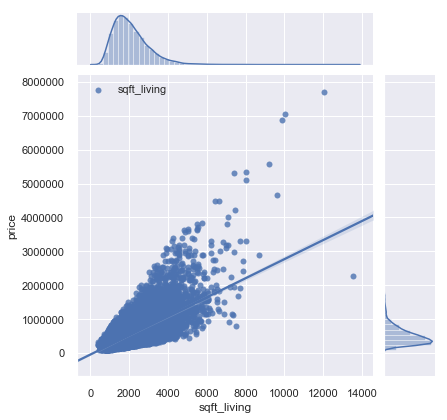

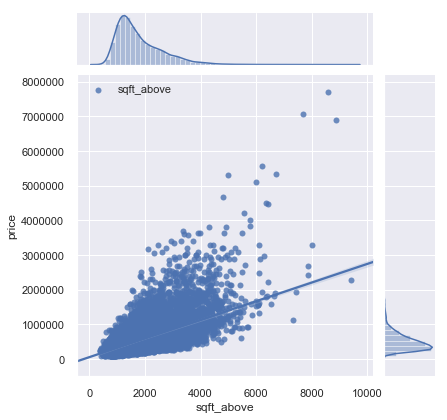

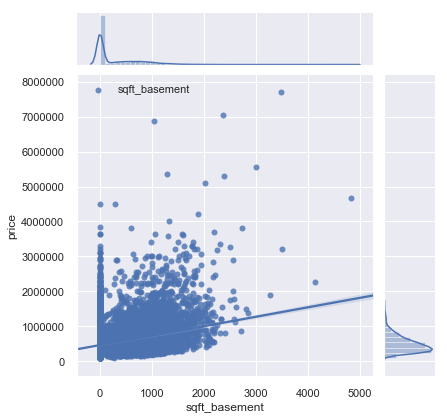

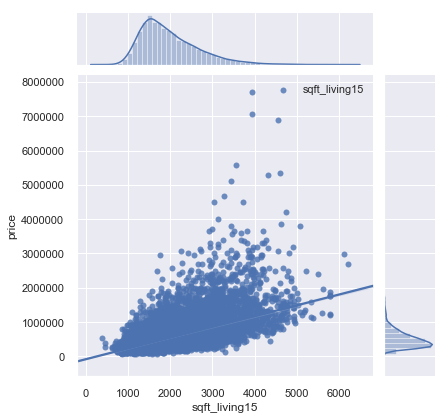

In [17]:
#checking for linearity assumptions between predictors and targets in df_one 
for i in ['sqft_living', 'sqft_above', 'sqft_basement' , 'sqft_living15']:
    sns.jointplot(x = i, y= 'price', data = df_num, kind= 'reg' ,label= i)
    
    plt.legend()
    plt.show()
